In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
train_df = pd.read_csv('preprocessed_train_Auto.csv')
test_df = pd.read_csv('prerocessed_test_Auto.csv')

In [3]:
# 탑에서 몇 번째 까지 뽑아주는 함수
def topList(df, column, number):
    topList = df[column].value_counts().nlargest(number).index
    return topList

In [4]:
# 포함할 값 제외 other로 만드는 함수
def makeOther(df, column, encludingList):
    newDf = df[column].where(df[column].isin(encludingList), other="Other")
    return newDf

### train 데이터 other 만들기

In [5]:
train_df['device.browser'].value_counts()

Chrome               16697
Safari                1210
Firefox                339
Internet Explorer      148
Edge                    74
Opera                   14
Safari (in-app)         12
Android Webview         10
Samsung Internet         8
YaBrowser                1
Amazon Silk              1
Name: device.browser, dtype: int64

In [6]:
columnList = topList(train_df, 'device.browser', 5)
train_df['device.browser'] = makeOther(train_df, 'device.browser', columnList)

In [7]:
train_df['device.browser'].value_counts()

Chrome               16697
Safari                1210
Firefox                339
Internet Explorer      148
Edge                    74
Other                   46
Name: device.browser, dtype: int64

In [8]:
columnList = topList(train_df, 'geoNetwork.continent', 1)
train_df['geoNetwork.continent'] = makeOther(train_df, 'geoNetwork.continent', columnList)

In [9]:
columnList = topList(train_df, 'geoNetwork.subContinent', 1)
train_df['geoNetwork.subContinent'] = makeOther(train_df, 'geoNetwork.subContinent', columnList)

In [10]:
columnList = topList(train_df, 'geoNetwork.country', 1)
train_df['geoNetwork.country'] = makeOther(train_df, 'geoNetwork.country', columnList)

In [11]:
columnList = topList(train_df, 'geoNetwork.region', 6)
train_df['geoNetwork.region'] = makeOther(train_df, 'geoNetwork.region', columnList)

In [12]:
columnList = topList(train_df, 'geoNetwork.metro', 12)
train_df['geoNetwork.metro'] = makeOther(train_df, 'geoNetwork.metro', columnList)

In [13]:
columnList = topList(train_df, 'geoNetwork.city', 10)
train_df['geoNetwork.city'] = makeOther(train_df, 'geoNetwork.city', columnList)

In [14]:
columnList = topList(train_df, 'trafficSource.campaign', 3)
train_df['trafficSource.campaign'] = makeOther(train_df, 'trafficSource.campaign', columnList)

In [15]:
columnList = topList(train_df, 'trafficSource.source', 5)
train_df['trafficSource.source'] = makeOther(train_df, 'trafficSource.source', columnList)

### test데이터 other 만들기

In [16]:
columnList = topList(train_df, 'device.browser', 5)
test_df['device.browser'] = makeOther(test_df, 'device.browser', columnList)

In [17]:
columnList = topList(train_df, 'geoNetwork.continent', 1)
test_df['geoNetwork.continent'] = makeOther(test_df, 'geoNetwork.continent', columnList)

In [18]:
columnList = topList(train_df, 'geoNetwork.subContinent', 1)
test_df['geoNetwork.subContinent'] = makeOther(test_df, 'geoNetwork.subContinent', columnList)

In [19]:
columnList = topList(train_df, 'geoNetwork.country', 1)
test_df['geoNetwork.country'] = makeOther(test_df, 'geoNetwork.country', columnList)

In [20]:
columnList = topList(train_df, 'geoNetwork.region', 6)
test_df['geoNetwork.region'] = makeOther(test_df, 'geoNetwork.region', columnList)

In [21]:
columnList = topList(train_df, 'geoNetwork.metro', 12)
test_df['geoNetwork.metro'] = makeOther(test_df, 'geoNetwork.metro', columnList)

In [22]:
columnList = topList(train_df, 'geoNetwork.city', 10)
test_df['geoNetwork.city'] = makeOther(test_df, 'geoNetwork.city', columnList)

In [23]:
columnList = topList(train_df, 'trafficSource.campaign', 3)
test_df['trafficSource.campaign'] = makeOther(test_df, 'trafficSource.campaign', columnList)

In [24]:
columnList = topList(train_df, 'trafficSource.source', 5)
test_df['trafficSource.source'] = makeOther(test_df, 'trafficSource.source', columnList)

In [25]:
train_df['trafficSource.adwordsClickInfo.slot'].value_counts()

Top    650
RHS     11
Name: trafficSource.adwordsClickInfo.slot, dtype: int64

In [26]:
train_df['trafficSource.referralPath'].value_counts()

/                                                                                                 8257
/mail/u/0/                                                                                          83
/offer/2145                                                                                         80
/a/google.com/forum/                                                                                41
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts                  37
                                                                                                  ... 
/HBtw4R2RL5                                                                                          1
/neo/rd                                                                                              1
/a/google.com/another-attempt-google-merchandise-store/mountain-view-on-site-merchandise-store       1
/2610273/projects/12161610/todos/250267685                               

### 컬럼 드랍

In [27]:
train_df.drop(['Unnamed: 0', 'trafficSource.referralPath', 'trafficSource.adContent', 'trafficSource.adContent', 
               'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.gclId',
               'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.keyword'], axis=1, inplace=True)

test_df.drop(['Unnamed: 0', 'trafficSource.referralPath', 'trafficSource.adContent', 'trafficSource.adContent', 
               'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.gclId',
               'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.keyword'], axis=1, inplace=True)

### boolean 컬럼 -> int형 변환

In [28]:
train_df['device.isMobile'] = train_df['device.isMobile'].astype('int64')
test_df['device.isMobile'] = test_df['device.isMobile'].astype('int64')

### 레이블 인코딩

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18514 entries, 0 to 18513
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channelGrouping                 18514 non-null  object 
 1   visitNumber                     18514 non-null  int64  
 2   device.browser                  18514 non-null  object 
 3   device.operatingSystem          18514 non-null  object 
 4   device.isMobile                 18514 non-null  int64  
 5   device.deviceCategory           18514 non-null  object 
 6   geoNetwork.continent            18514 non-null  object 
 7   geoNetwork.subContinent         18514 non-null  object 
 8   geoNetwork.country              18514 non-null  object 
 9   geoNetwork.region               18514 non-null  object 
 10  geoNetwork.metro                18514 non-null  object 
 11  geoNetwork.city                 18514 non-null  object 
 12  totals.hits                     

In [30]:
train_df['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Direct', 'Paid Search', 'Display',
       'Social', 'Affiliates', '(Other)'], dtype=object)

In [31]:
train_df['device.browser'].unique()

array(['Chrome', 'Safari', 'Internet Explorer', 'Firefox', 'Other',
       'Edge'], dtype=object)

In [32]:
train_df['device.operatingSystem'].unique()

array(['Macintosh', 'Windows', 'iOS', 'Chrome OS', 'Linux', 'Android',
       'Windows Phone'], dtype=object)

In [33]:
train_df['device.deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [34]:
train_df['geoNetwork.continent'].unique()

array(['Americas', 'Other'], dtype=object)

In [35]:
train_df['geoNetwork.subContinent'].unique()

array(['Northern America', 'Other'], dtype=object)

In [36]:
train_df['geoNetwork.country'].unique()

array(['United States', 'Other'], dtype=object)

In [37]:
train_df['geoNetwork.region'].unique()

array(['New York', 'California', 'not available in demo dataset',
       'Illinois', 'Other', 'Washington', 'Texas'], dtype=object)

In [38]:
train_df['geoNetwork.metro'].unique()

array(['New York NY', 'Los Angeles CA',
       'San Francisco-Oakland-San Jose CA',
       'not available in demo dataset', 'Chicago IL',
       'Boston MA-Manchester NH', 'Detroit MI', 'Seattle-Tacoma WA',
       'Other', 'Washington DC (Hagerstown MD)', '(not set)',
       'Atlanta GA', 'Austin TX'], dtype=object)

In [39]:
train_df['geoNetwork.city'].unique()

array(['New York', 'Other', 'Mountain View',
       'not available in demo dataset', 'Chicago', 'San Francisco',
       'Los Angeles', 'Sunnyvale', 'San Jose', 'Seattle', 'Austin'],
      dtype=object)

In [40]:
train_df['trafficSource.campaign'].unique()

array(['(not set)', 'AW - Dynamic Search Ads Whole Site',
       'AW - Accessories', 'Other'], dtype=object)

In [41]:
train_df['trafficSource.source'].unique()

array(['google', '(direct)', 'sites.google.com', 'dfa', 'Other',
       'mail.google.com'], dtype=object)

In [42]:
train_df['trafficSource.medium'].unique()

array(['organic', '(none)', 'cpc', 'referral', 'cpm', 'affiliate',
       '(not set)'], dtype=object)

In [43]:
encoding_columns=['channelGrouping','device.browser','device.operatingSystem', 'device.deviceCategory',
                  'geoNetwork.continent','geoNetwork.subContinent','geoNetwork.country', 
                  'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city', 'trafficSource.campaign',
                  'trafficSource.source', 'trafficSource.medium']

not_encoding_columns = ['visitNumber','device.isMobile', 'totals.hits','totals.pageviews', 'totals.sessionQualityDim',
                        'totals.timeOnSite','totals.transactions', 'totals.totalTransactionRevenue', '_visitHour']


In [44]:
enc_classes = {}
def encoding_label(x): # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_ # x.name: 컬럼명
    return label

In [45]:
d1 = train_df[encoding_columns].apply(encoding_label)
d1.head()

,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,trafficSource.campaign,trafficSource.source,trafficSource.medium
0,4,0,3,0,0,0,1,2,7,4,0,3,5
1,6,0,4,0,0,0,1,0,6,5,0,0,0
2,4,5,6,1,0,0,1,0,9,3,0,3,5
3,6,0,3,0,0,0,1,0,9,3,0,0,0
4,6,0,3,0,0,0,1,2,7,4,0,0,0


In [46]:
d2 = train_df[not_encoding_columns]
d2.head()


,visitNumber,device.isMobile,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.totalTransactionRevenue,_visitHour
0,4,0,9,9.0,13.0,261.0,1.0,17.19,9
1,11,0,15,12.0,38.0,285.0,1.0,13.00,7
2,6,1,15,15.0,42.0,1044.0,1.0,65.30,22
3,17,0,18,16.0,77.0,514.0,1.0,25.23,6
4,1,0,21,20.0,62.0,487.0,1.0,16.31,6


In [47]:
encoded_train_df = d1.join(d2)
encoded_train_df.head()

,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,...,trafficSource.medium,visitNumber,device.isMobile,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.totalTransactionRevenue,_visitHour
0,4,0,3,0,0,0,1,2,7,4,...,5,4,0,9,9.0,13.0,261.0,1.0,17.19,9
1,6,0,4,0,0,0,1,0,6,5,...,0,11,0,15,12.0,38.0,285.0,1.0,13.00,7
2,4,5,6,1,0,0,1,0,9,3,...,5,6,1,15,15.0,42.0,1044.0,1.0,65.30,22
3,6,0,3,0,0,0,1,0,9,3,...,0,17,0,18,16.0,77.0,514.0,1.0,25.23,6
4,6,0,3,0,0,0,1,2,7,4,...,0,1,0,21,20.0,62.0,487.0,1.0,16.31,6


In [48]:
d1 = test_df[encoding_columns].apply(encoding_label)
d1.head()

,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,trafficSource.campaign,trafficSource.source,trafficSource.medium
0,1,0,1,0,0,0,1,5,11,9,0,0,0
1,3,0,3,0,0,0,1,0,9,3,0,3,4
2,1,0,4,0,0,0,1,5,11,9,0,0,0
3,5,0,3,0,0,0,1,3,2,0,0,0,0
4,3,0,0,1,0,0,1,0,9,6,0,3,4


In [49]:
d2 = test_df[not_encoding_columns]
d2.head()


,visitNumber,device.isMobile,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.totalTransactionRevenue,_visitHour
0,1,0,11,10.0,53,302.0,1.0,24.99,22
1,1,0,15,11.0,10,169.0,1.0,151.99,10
2,1,0,16,14.0,28,213.0,1.0,9.73,0
3,3,0,17,14.0,75,2016.0,1.0,84.62,0
4,1,1,18,16.0,16,1355.0,1.0,45.98,13


In [50]:
encoded_test_df = d1.join(d2)
encoded_test_df.head()

,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,...,trafficSource.medium,visitNumber,device.isMobile,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.totalTransactionRevenue,_visitHour
0,1,0,1,0,0,0,1,5,11,9,...,0,1,0,11,10.0,53,302.0,1.0,24.99,22
1,3,0,3,0,0,0,1,0,9,3,...,4,1,0,15,11.0,10,169.0,1.0,151.99,10
2,1,0,4,0,0,0,1,5,11,9,...,0,1,0,16,14.0,28,213.0,1.0,9.73,0
3,5,0,3,0,0,0,1,3,2,0,...,0,3,0,17,14.0,75,2016.0,1.0,84.62,0
4,3,0,0,1,0,0,1,0,9,6,...,4,1,1,18,16.0,16,1355.0,1.0,45.98,13


<AxesSubplot:>

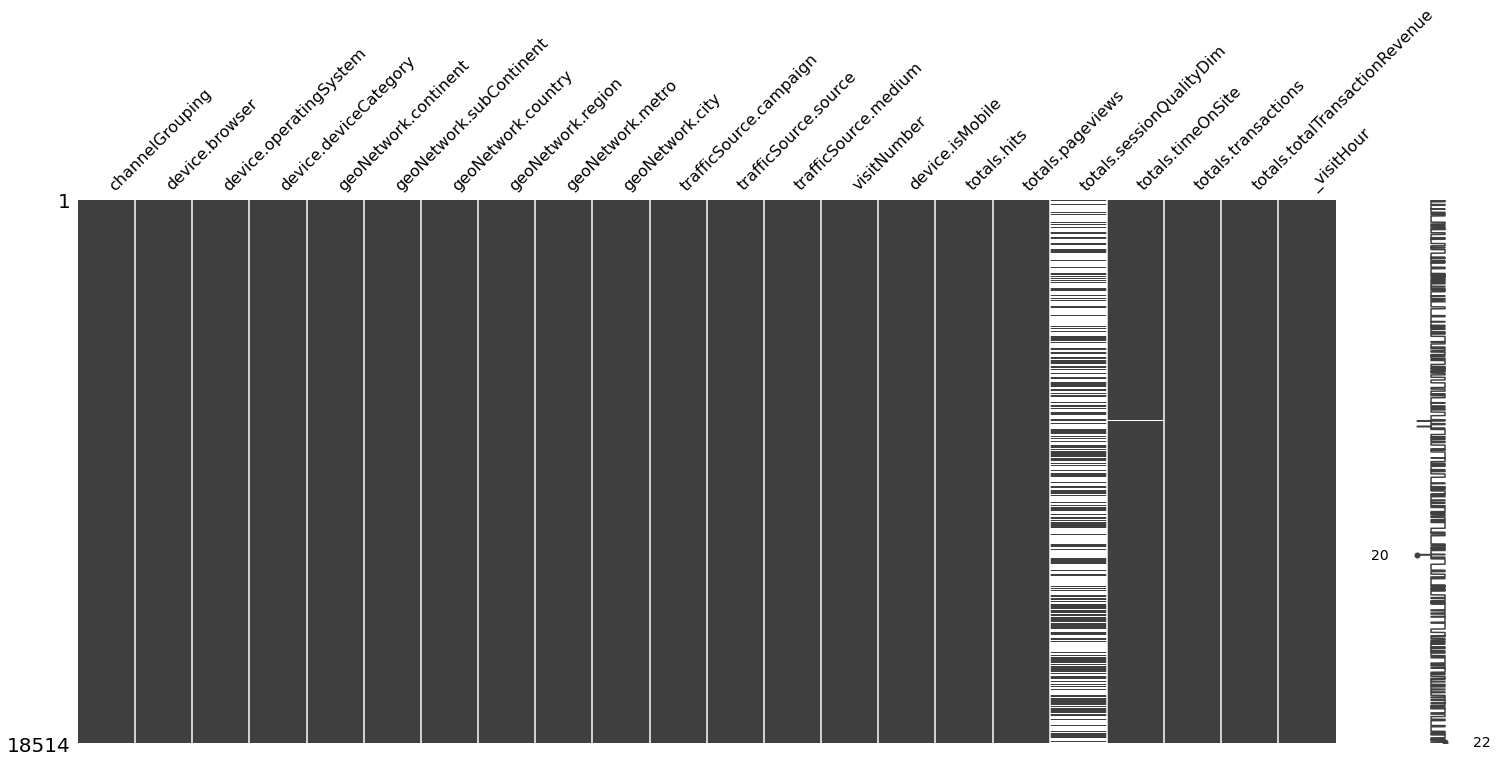

In [51]:
msno.matrix(encoded_train_df)

<AxesSubplot:>

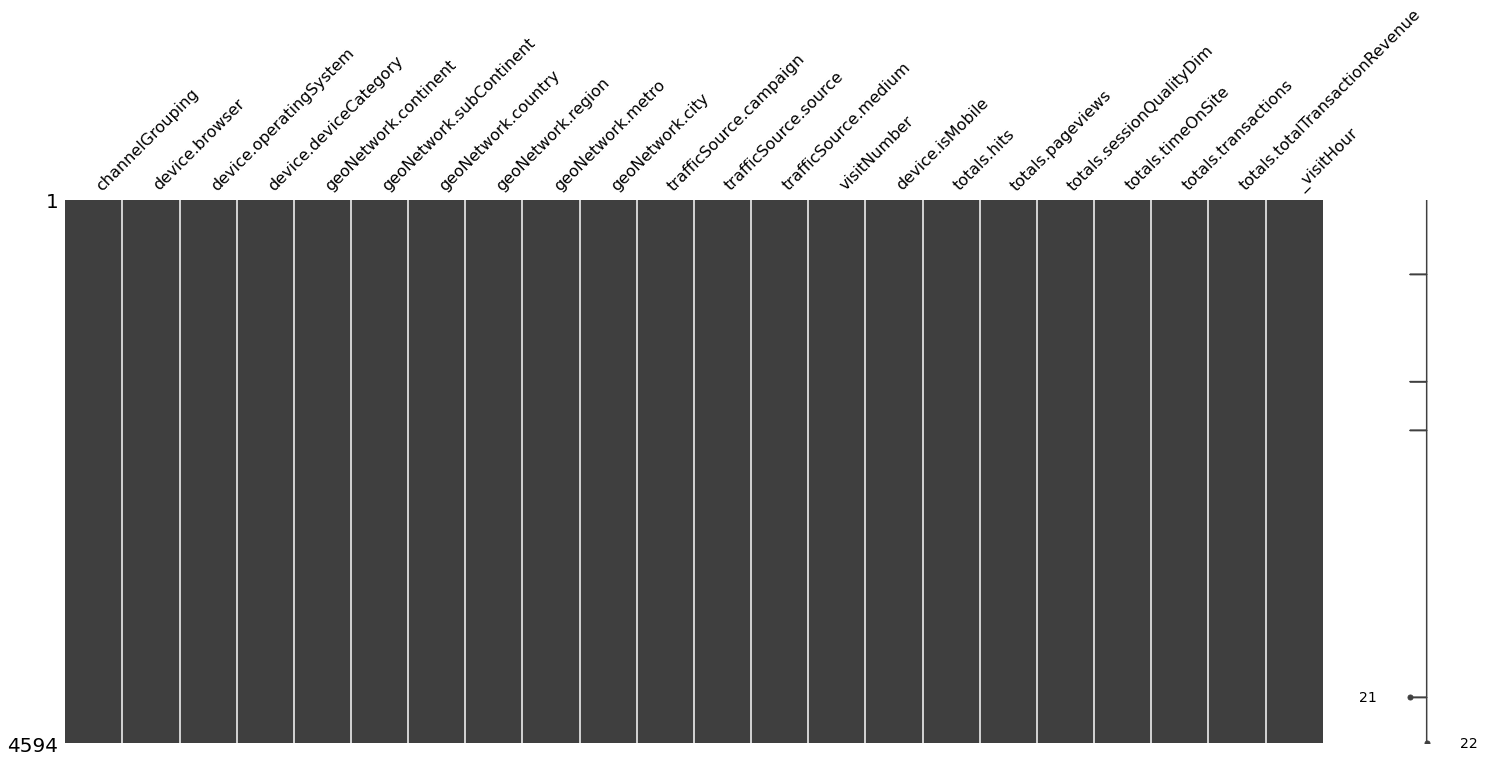

In [52]:
msno.matrix(encoded_test_df)

In [53]:
encoded_train_df['totals.sessionQualityDim'].isnull().sum()

10465

##### totals.sessionQualityDim열의 결측치가 너무 많으니 드랍하자

In [54]:
encoded_train_df.drop(['totals.sessionQualityDim'], axis=1, inplace=True)
encoded_test_df.drop(['totals.sessionQualityDim'], axis=1, inplace=True)

In [55]:
# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 0) & (encoded_train_df['totals.sessionQualityDim'] < 10)
# zero_to_ten = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(zero_to_ten)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 10) & (encoded_train_df['totals.sessionQualityDim'] < 20)
# ten_to_twenty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(ten_to_twenty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 20) & (encoded_train_df['totals.sessionQualityDim'] < 30)
# twenty_to_thirty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(twenty_to_thirty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 30) & (encoded_train_df['totals.sessionQualityDim'] < 40)
# thirty_to_forty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(thirty_to_forty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 50) & (encoded_train_df['totals.sessionQualityDim'] < 60)
# forty_to_fifty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(forty_to_fifty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 60) & (encoded_train_df['totals.sessionQualityDim'] < 70)
# fifty_to_sixty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(fifty_to_sixty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 70) & (encoded_train_df['totals.sessionQualityDim'] < 80)
# seventy_to_eighty = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(seventy_to_eighty)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 80) & (encoded_train_df['totals.sessionQualityDim'] < 90)
# eighty_to_ninety = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(eighty_to_ninety)

# filtered_rows = (encoded_train_df['totals.sessionQualityDim'] >= 90) & (encoded_train_df['totals.sessionQualityDim'] <= 100)
# eighty_to_hundred = encoded_train_df.loc[filtered_rows, 'totals.totalTransactionRevenue'].mean()
# print(eighty_to_hundred)

##### totals.sessionQualityDim이 올라갈 수록   totals.sessionQualityDim도 상승함

In [56]:
# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] > 0) & (encoded_train_df['totals.totalTransactionRevenue'] < 56)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(5, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 56) & (encoded_train_df['totals.totalTransactionRevenue'] < 61)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(15, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 61) & (encoded_train_df['totals.totalTransactionRevenue'] < 72)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(25, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 72) & (encoded_train_df['totals.totalTransactionRevenue'] < 80)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(35, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 80) & (encoded_train_df['totals.totalTransactionRevenue'] < 93)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(45, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 93) & (encoded_train_df['totals.totalTransactionRevenue'] < 113)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(55, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 113) & (encoded_train_df['totals.totalTransactionRevenue'] < 158)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(65, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 158) & (encoded_train_df['totals.totalTransactionRevenue'] < 169)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(75, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 169) & (encoded_train_df['totals.totalTransactionRevenue'] < 186)
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(85, inplace=True)

# filtered_rows = (encoded_train_df['totals.totalTransactionRevenue'] >= 186) 
# encoded_train_df.loc[filtered_rows, 'totals.sessionQualityDim'].fillna(95, inplace=True)

In [57]:
encoded_train_df = encoded_train_df.dropna(axis=0, how='any')

In [58]:
encoded_train_df['totals.timeOnSite'].isnull().sum()

0

##### totals.timeOnSite 결측치 평균값으로 대체

In [59]:
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18508 entries, 0 to 18513
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channelGrouping                 18508 non-null  int32  
 1   device.browser                  18508 non-null  int32  
 2   device.operatingSystem          18508 non-null  int32  
 3   device.deviceCategory           18508 non-null  int32  
 4   geoNetwork.continent            18508 non-null  int32  
 5   geoNetwork.subContinent         18508 non-null  int32  
 6   geoNetwork.country              18508 non-null  int32  
 7   geoNetwork.region               18508 non-null  int32  
 8   geoNetwork.metro                18508 non-null  int32  
 9   geoNetwork.city                 18508 non-null  int32  
 10  trafficSource.campaign          18508 non-null  int32  
 11  trafficSource.source            18508 non-null  int32  
 12  trafficSource.medium            

In [60]:
encoded_train_df['totals.timeOnSite'].value_counts()

442.0     30
439.0     29
497.0     28
360.0     27
315.0     26
          ..
2216.0     1
2823.0     1
2520.0     1
2519.0     1
2567.0     1
Name: totals.timeOnSite, Length: 3211, dtype: int64

In [61]:
encoded_train_df['totals.timeOnSite'].astype('float64')

0         261.0
1         285.0
2        1044.0
3         514.0
4         487.0
          ...  
18509    2454.0
18510    1375.0
18511    5381.0
18512    8811.0
18513    4037.0
Name: totals.timeOnSite, Length: 18508, dtype: float64

<AxesSubplot:>

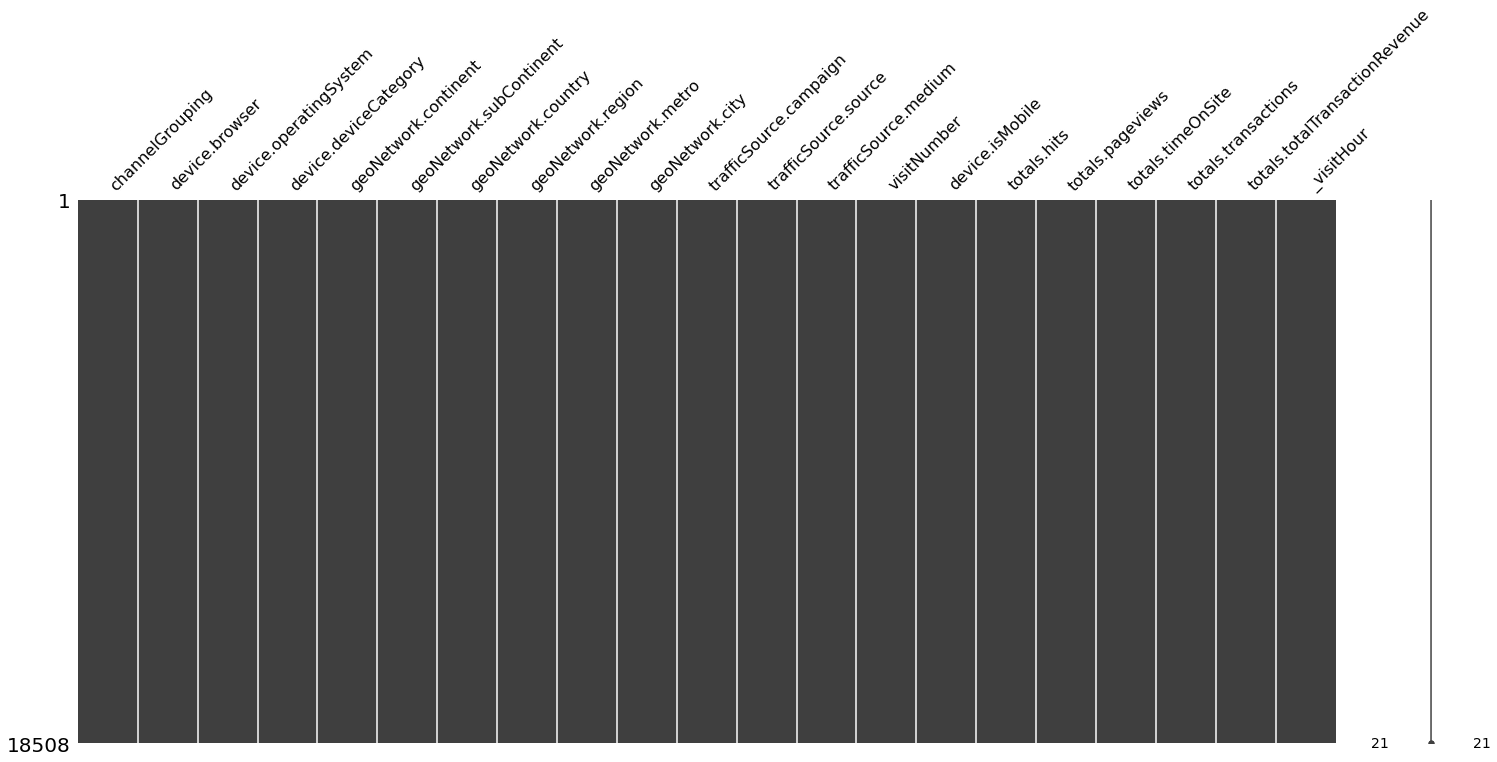

In [62]:
msno.matrix(encoded_train_df)

### 독립변수 로그변환

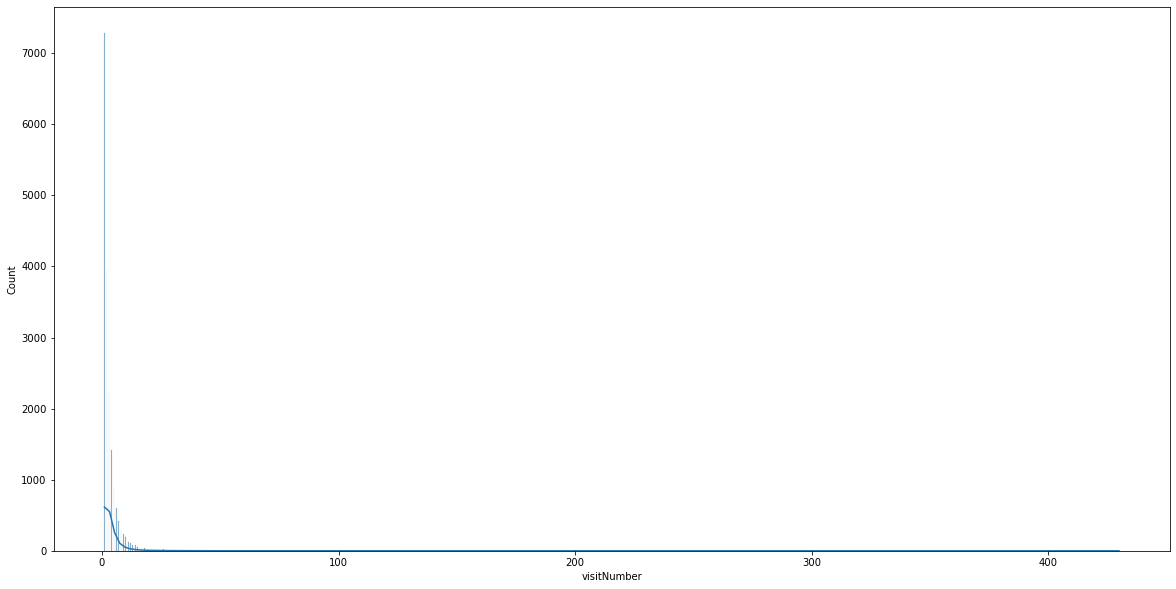

In [63]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='visitNumber', kde=True);

In [64]:
print("Skewness: {:.3f}".format(encoded_train_df["visitNumber"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["visitNumber"].kurt()))

Skewness: 19.377
Kurtosis: 466.294


Skewness: 1.785
Kurtosis: 5.209


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


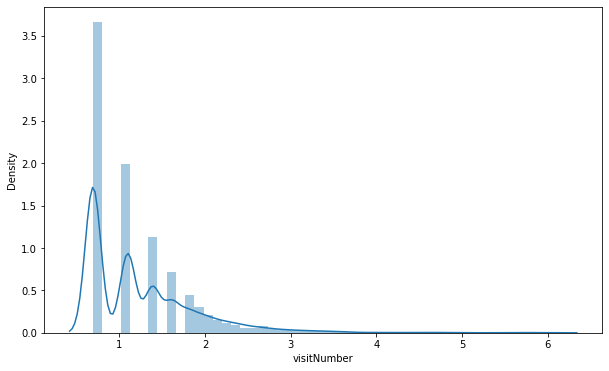

In [65]:
encoded_train_df['visitNumber'] = np.log1p(encoded_train_df['visitNumber'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["visitNumber"])
print("Skewness: {:.3f}".format(encoded_train_df["visitNumber"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["visitNumber"].kurt()))

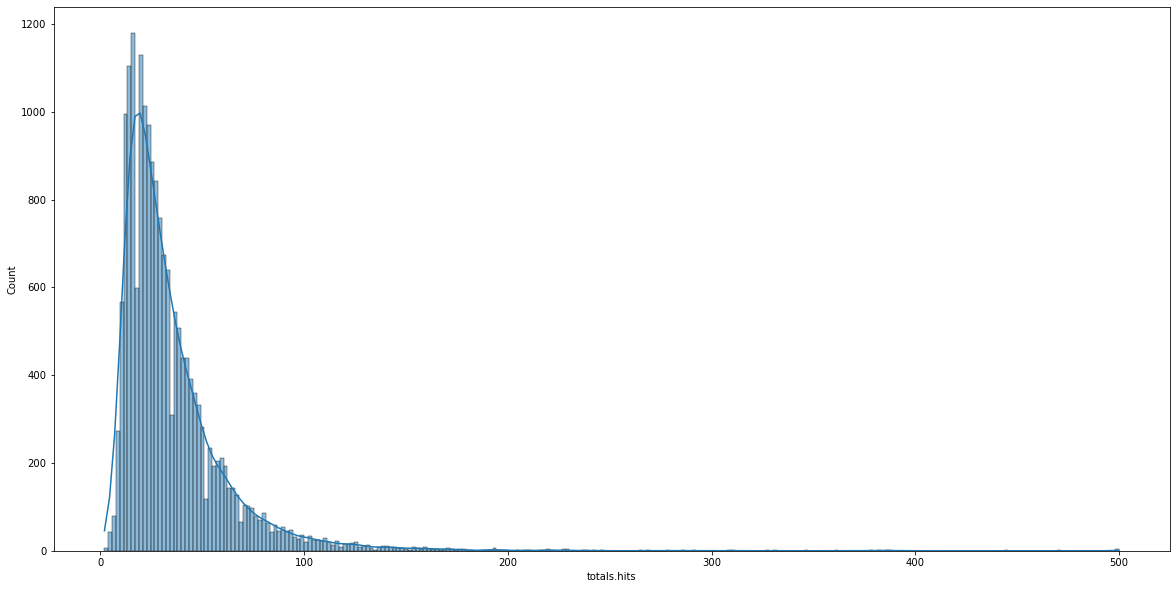

In [66]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='totals.hits', kde=True);

In [67]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.hits"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.hits"].kurt()))

Skewness: 4.432
Kurtosis: 43.321


Skewness: 0.395
Kurtosis: 0.248


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


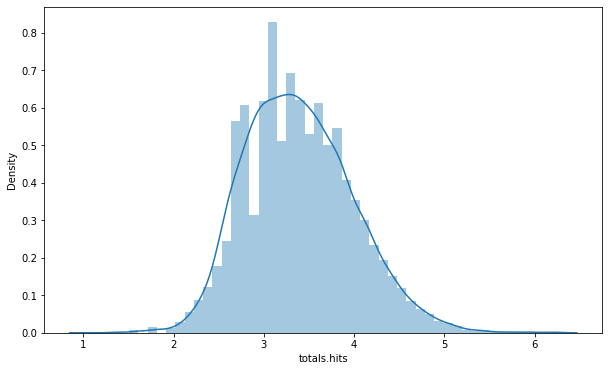

In [68]:
encoded_train_df['totals.hits'] = np.log1p(encoded_train_df['totals.hits'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.hits"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.hits"].kurt()))

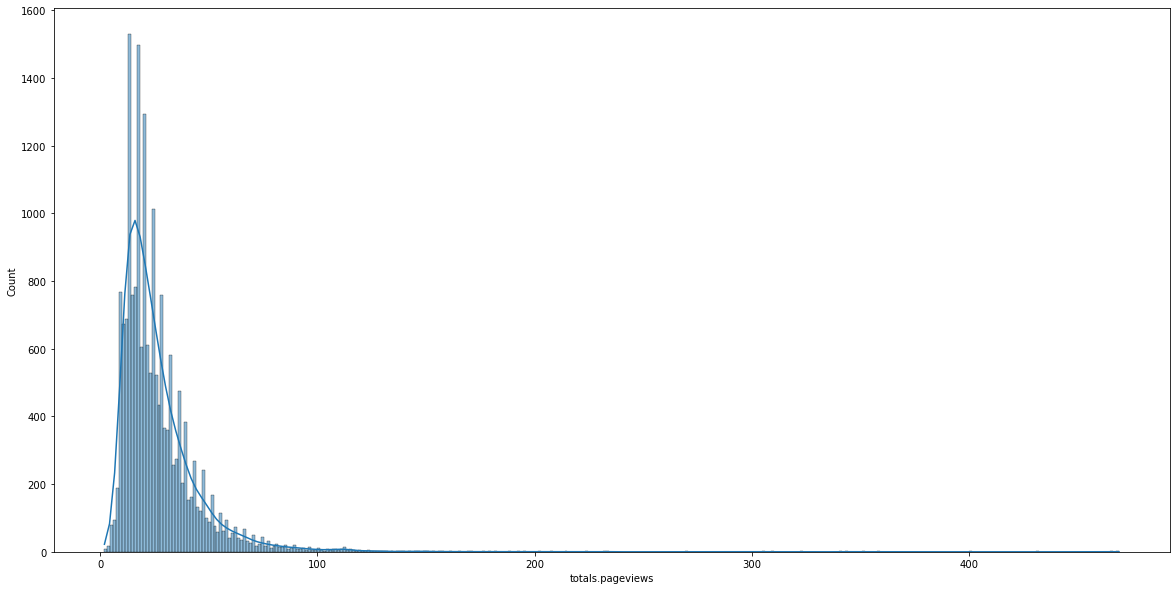

In [69]:
 plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='totals.pageviews', kde=True);

In [70]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.pageviews"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.pageviews"].kurt()))

Skewness: 5.564
Kurtosis: 75.524


Skewness: 0.466
Kurtosis: 0.547


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


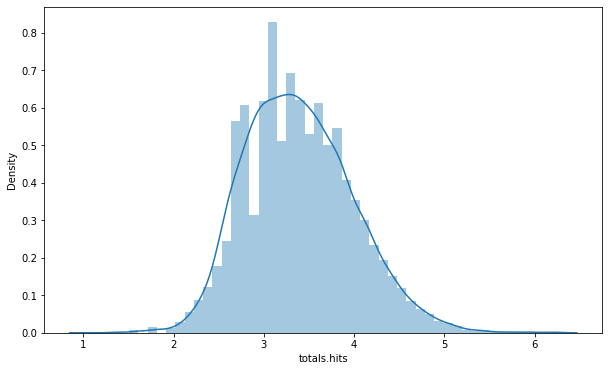

In [71]:
encoded_train_df['totals.pageviews'] = np.log1p(encoded_train_df['totals.pageviews'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.pageviews"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.pageviews"].kurt()))

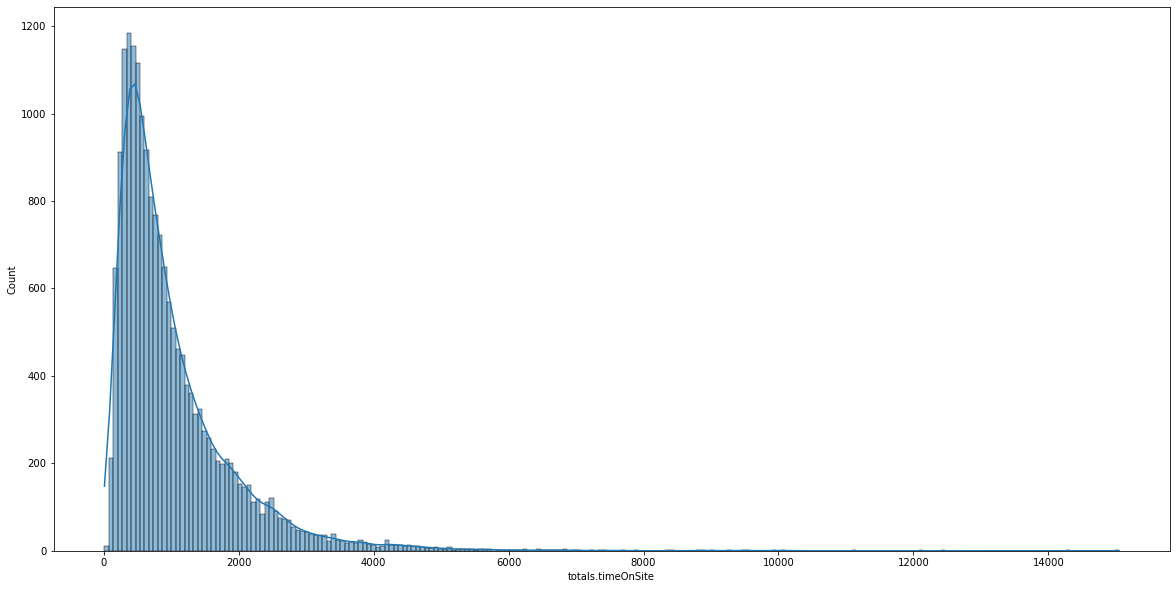

In [72]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='totals.timeOnSite', kde=True);

In [73]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.timeOnSite"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.timeOnSite"].kurt()))

Skewness: 3.001
Kurtosis: 18.775


Skewness: 0.030
Kurtosis: -0.232


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


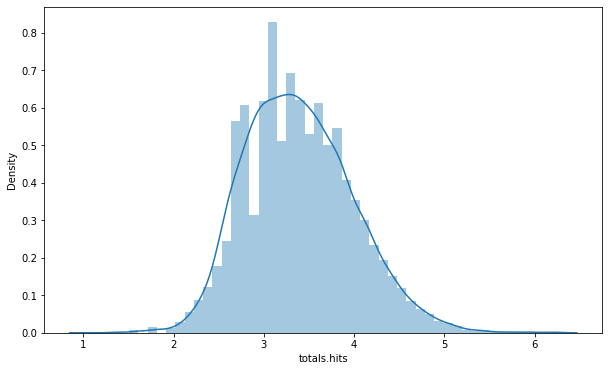

In [74]:
encoded_train_df['totals.timeOnSite'] = np.log1p(encoded_train_df['totals.timeOnSite'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.timeOnSite"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.timeOnSite"].kurt()))

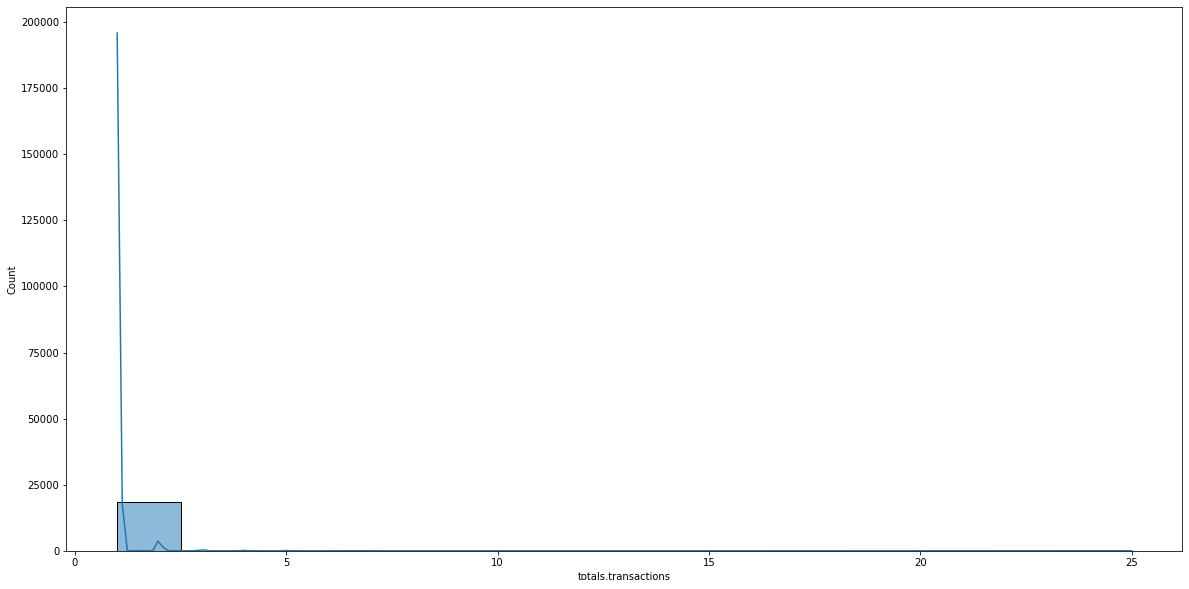

In [75]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='totals.transactions', kde=True);

In [76]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.transactions"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.transactions"].kurt()))

Skewness: 28.933
Kurtosis: 1326.192


Skewness: 9.973
Kurtosis: 144.311


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


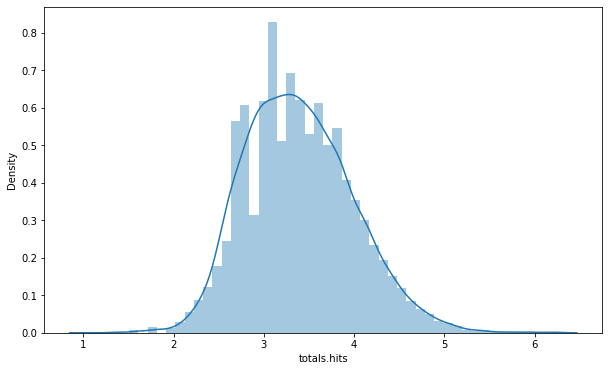

In [77]:
encoded_train_df['totals.transactions'] = np.log1p(encoded_train_df['totals.transactions'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.transactions"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.transactions"].kurt()))

In [78]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].kurt()))

Skewness: 40.138
Kurtosis: 2263.775


Skewness: 0.851
Kurtosis: 1.155


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


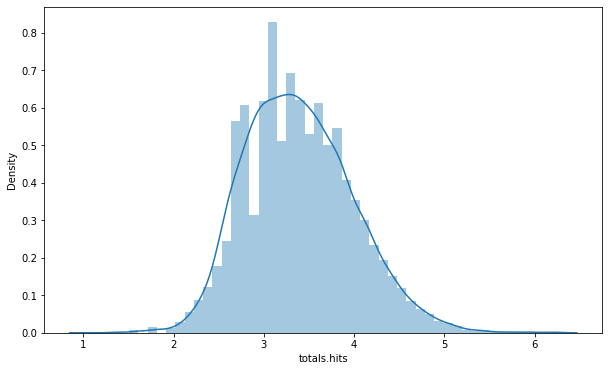

In [79]:
encoded_train_df['totals.totalTransactionRevenue'] = np.log1p(encoded_train_df['totals.totalTransactionRevenue'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].kurt()))

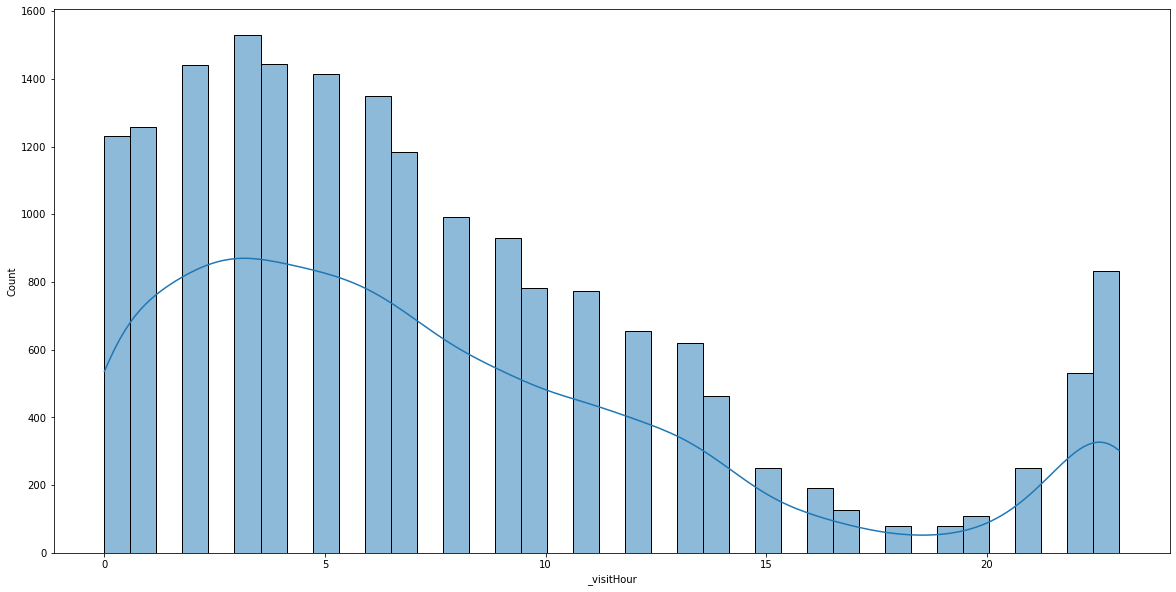

In [80]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='_visitHour', kde=True);

In [81]:
print("Skewness: {:.3f}".format(encoded_train_df["_visitHour"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["_visitHour"].kurt()))

Skewness: 1.009
Kurtosis: 0.272


### 종속변수 로그변환

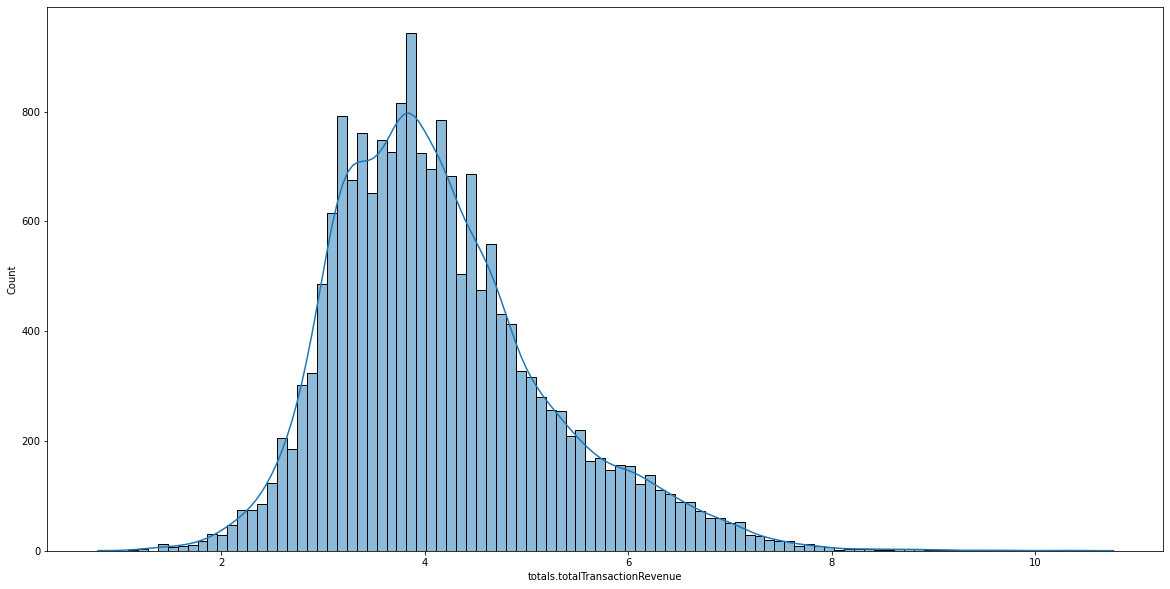

In [82]:
plt.figure(figsize=(20,10))
sns.histplot(data=encoded_train_df, x='totals.totalTransactionRevenue', kde=True);

In [83]:
print("Skewness: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].kurt()))

Skewness: 0.851
Kurtosis: 1.155


Skewness: 0.174
Kurtosis: 0.346


C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


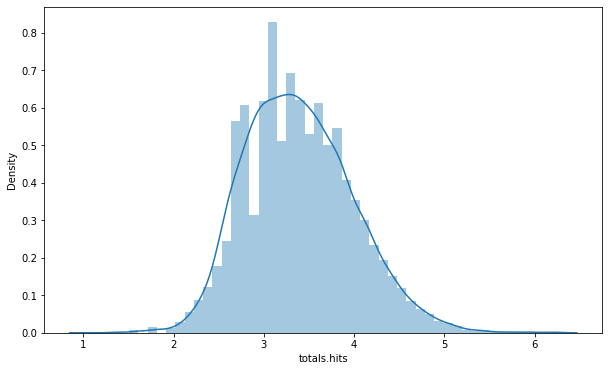

In [84]:
encoded_train_df['totals.totalTransactionRevenue'] = np.log1p(encoded_train_df['totals.totalTransactionRevenue'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(encoded_train_df["totals.hits"])
print("Skewness: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].skew())) 
print("Kurtosis: {:.3f}".format(encoded_train_df["totals.totalTransactionRevenue"].kurt()))

### test데이터 로그변환

In [85]:
encoded_test_df['visitNumber'] = np.log1p(encoded_test_df['visitNumber'])
encoded_test_df['totals.hits'] = np.log1p(encoded_test_df['totals.hits'])
encoded_test_df['totals.pageviews'] = np.log1p(encoded_test_df['totals.pageviews'])
encoded_test_df['totals.timeOnSite'] = np.log1p(encoded_test_df['totals.timeOnSite'])
encoded_test_df['totals.transactions'] = np.log1p(encoded_test_df['totals.transactions'])
encoded_test_df['totals.totalTransactionRevenue'] = np.log1p(encoded_test_df['totals.totalTransactionRevenue'])

In [86]:
encoded_train_df.reset_index(drop=False, inplace=True)
encoded_test_df.reset_index(drop=False, inplace=True)

In [87]:
encoded_train_df.drop('index', 1, inplace=True)
encoded_test_df.drop('index', 1, inplace=True)

### LightGBM

In [88]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
# traing_columns = ['channelGrouping', 'device.browser', 'device.operatingSystem',
#                    'device.deviceCategory', 'geoNetwork.continent',
#                    'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
#                    'geoNetwork.metro', 'geoNetwork.city', 'trafficSource.campaign',
#                    'trafficSource.source', 'trafficSource.medium', 'visitNumber',
#                    'device.isMobile', 'totals.hits', 'totals.pageviews',
#                    'totals.timeOnSite', 'totals.transactions', '_visitHour']
# y_train = encoded_train_df['totals.totalTransactionRevenue']
# X_train = encoded_train_df[traing_columns]

# y_test = encoded_test_df['totals.totalTransactionRevenue']
# X_test = encoded_test_df[traing_columns]

In [90]:
X_train = np.array(encoded_train_df.drop('totals.totalTransactionRevenue', 1))
y_train = np.array(encoded_train_df['totals.totalTransactionRevenue'])

X_test = np.array(encoded_train_df.drop('totals.totalTransactionRevenue', 1))
y_test = np.array(encoded_train_df['totals.totalTransactionRevenue'])

In [91]:
from sklearn.model_selection import KFold
n_splits = 5
SEED=30
kfold = KFold(n_splits=n_splits, random_state=SEED)

C:\Users\JuNoe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [92]:
lgbm_fold = LGBMRegressor(random_state=SEED)

i = 1
total_error = 0

for train_index, test_index in kfold.split(X_train):
    x_train_fold, x_valid_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    error = mean_squared_error(lgbm_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 0.03
Fold = 2, prediction score = 0.03
Fold = 3, prediction score = 0.03
Fold = 4, prediction score = 0.03
Fold = 5, prediction score = 0.03
------------------------------
Average Error: 0.031157802023254466


In [93]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [94]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [96]:
abs(grid_search.best_score_)

0.03136284428176215

In [97]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 0.8}

### 모델 성능 예측을 위한 함수

In [98]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

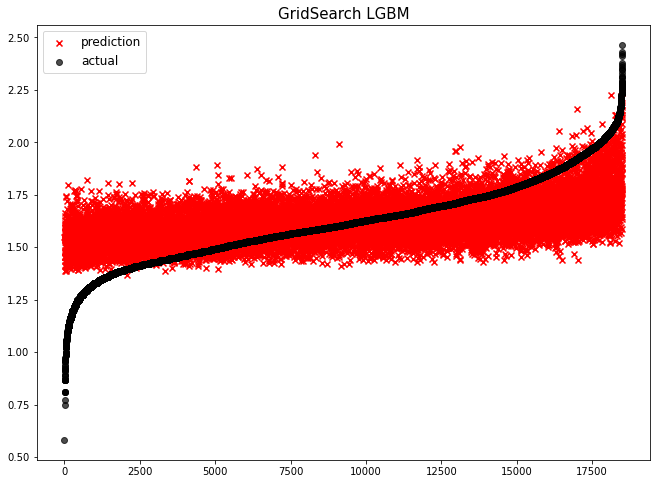

             model       mse
0  GridSearch LGBM  0.027197


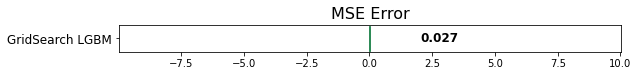

In [99]:
lgbm_best = LGBMRegressor(**grid_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)

In [100]:
feature = encoded_train_df.drop(['totals.totalTransactionRevenue'], axis=1)

In [101]:
feature_test = encoded_test_df.drop(['totals.totalTransactionRevenue'], axis=1)

### SHAP 변수 영향도 

In [ ]:
# !pip install shap

In [104]:
import shap

In [105]:
val_split = encoded_test_df

cols_to_drop = ['totals.totalTransactionRevenue']
cols_to_fit = [col for col in feature.columns if col not in cols_to_drop]

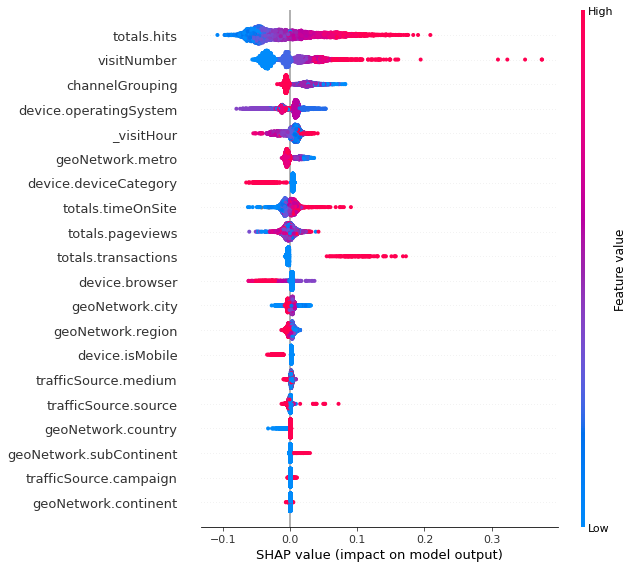

In [106]:
explainer = shap.TreeExplainer(lgbm_best)
shap_values = explainer.shap_values(val_split[cols_to_fit])
shap.summary_plot(shap_values, val_split[cols_to_fit])

### LightGBM 중요변수

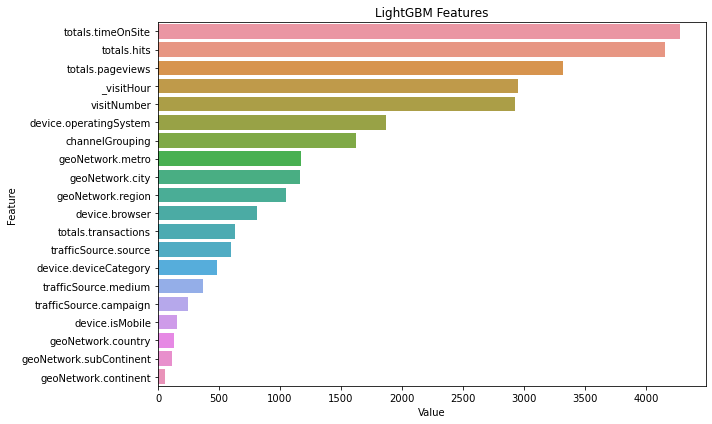

In [107]:
feature_importance = pd.DataFrame(sorted(zip(lgbm_best.feature_importances_, feature)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
graph = lgb.plot_importance(lgbm_best, max_num_features=10)

In [ ]:
lgbm_best.importance_type

In [ ]:
LGBMRegressor

In [ ]:
# for train_index, test_index in s_fold.split(X_train, y_train): 
#     # 이 부분이 k-fold 교차방식 코드와 다른점.
#     # s_fold.split(X,y): 레이블 데이터 분포도에 따라 학습/검증 데이터를 나눔
#     # index를 이용해 훈련/평가 데이터셋 추출
#     X_train_val, y_train_val = X_train[train_index], y_train[train_index]
#     X_test_val, y_test_val = X_train[test_index], y_train[test_index]

#     # 모델 생성
#     train_ds = lgb.Dataset(X_train_val, label=y_train_val)
#     test_ds = lgb.Dataset(X_test_val, label=y_test_val)
#     params = {"objective" : "regression",
#                 "metric" : "rmse", 
#                 "num_leaves" : 30,
#                 "min_child_samples" : 100,
#                 "learning_rate" : 0.1,
#                 "bagging_fraction" : 0.7,
#                 "feature_fraction" : 0.5,
#                 "bagging_frequency" : 5,
#                 "bagging_seed" : 2021,
#                 "verbosity" : -1}
#     # 모델 학습
#     model = lgb.train(params,train_ds, 1000, test_ds, valid_sets=[test_ds] verbose_eval=100, early_stopping_rounds=100)
#     # 모델 평가
#     error = mean_squared_error(lgbm_pred_fold, y_valid_fold)
# #     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
# #     pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)

In [ ]:
X_test.info()